# RNN(Recurrent Neural Networks)
## 케라스의 순환 층 :  `SimpleRNN` 층
### `(batch_size, timesteps, input_features)` 크기의 입력을 받음
### 케라스에 있는 모든 순환 층과 동일하게 `SimpleRNN`은 두 가지 모드로 실행할 수 있음
* 각 타임스텝의 출력을 모은 전체 시퀀스를 반환 : `(batch_size, timesteps, output_features)`인 3D 텐서
* 입력 시퀀스에 대한 마지막 출력만 반환 : `(batch_size, output_features)`인 2D 텐서
* 이 모드는 객체를 생성할 때 `return_sequences` 매개변수로 선택할 수 있음

In [1]:
from keras.layers import SimpleRNN

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))  # V(input_dim),D(ouput_dim) -> output: N, T, D
model.add(SimpleRNN(32))  # H -> output: N, H
model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = Sequential()
model.add(Embedding(10000, 32))  # V(input_dim),D(ouput_dim) -> output: N, T, D
model.add(SimpleRNN(32, return_sequences=True))  # H -> output: N, T, H
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


* 네트워크의 표현력을 증가시키기 위해 여러 개의 순환 층을 차례대로 쌓는 것이 유용할 때가 있음
* 이런 설정에서는 중간 층들이 전체 출력 시퀀스를 반환하도록 설정해야 함

In [4]:
model = Sequential()
model.add(Embedding(10000, 32))  # V(input_dim),D(ouput_dim) -> output: N, T, D
model.add(SimpleRNN(32, return_sequences=True))  # H -> output: N, T, H
model.add(SimpleRNN(32, return_sequences=True))  # H -> output: N, T, H
model.add(SimpleRNN(32, return_sequences=True))  # H -> output: N, T, H
model.add(SimpleRNN(32))  # 맨 위 층만 마지막 출력을 반환합니다.  # H -> output: N, H
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


## 이제 IMDB 영화 리뷰 분류 문제에 적용해 보자
* 먼저 데이터를 전처리함

In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # V, 특성으로 사용할 단어의 수
maxlen = 500  # T, 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


* `Embedding` 층과 `SimpleRNN` 층을 사용해 간단한 순환 네트워크를 훈련시키자

In [6]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32)) # V(input_dim),D(ouput_dim) -> output: N, T, D
model.add(SimpleRNN(32))  # H -> output: N, H
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,  # N, T,(V)
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 21s 1ms/step - loss: 0.6518 - acc: 0.6023 - val_loss: 0.5320 - val_acc: 0.7328
Epoch 2/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.4185 - acc: 0.8215 - val_loss: 0.4264 - val_acc: 0.8146
Epoch 3/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.3112 - acc: 0.8740 - val_loss: 0.3984 - val_acc: 0.8254
Epoch 4/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.2375 - acc: 0.9076 - val_loss: 0.3938 - val_acc: 0.8286
Epoch 5/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.1795 - acc: 0.9328 - val_loss: 0.3935 - val_acc: 0.8396
Epoch 6/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1269 - acc: 0.9551 - val_loss: 0.6271 - val_acc: 0.7980
Epoch 7/10
20000/20000 [=

* 이제 훈련과 검증의 손실과 정확도를 그래프로 그리자

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

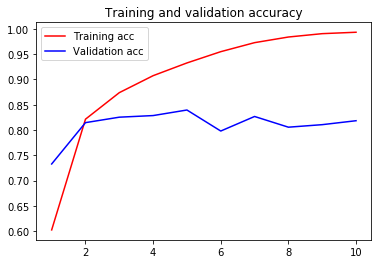

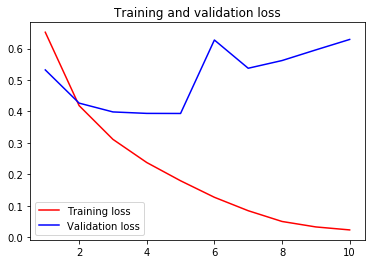

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

* 간단한 순환 네트워크는 FNN 모델보다 성능이 높지 않음
* 이유는 전체 시퀀스가 아니라 처음 500개의 단어만 입력에 사용했기 때문
* 또 다른 이유는 `SimpleRNN`이 텍스트와 같이 긴 시퀀스를 처리하는데 적합하지 않기 때문 --> LSTM 적용

# LSTM 적용

In [9]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))  # V(input_dim),D(ouput_dim) -> output: N, T, D
model.add(LSTM(32))  # H -> output: N, H
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,  # N, T, (V)
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 85s 4ms/step - loss: 0.5139 - acc: 0.7604 - val_loss: 0.3844 - val_acc: 0.8520
Epoch 2/10
20000/20000 [==============================] - 85s 4ms/step - loss: 0.2973 - acc: 0.8855 - val_loss: 0.2990 - val_acc: 0.8728
Epoch 3/10
20000/20000 [==============================] - 86s 4ms/step - loss: 0.2329 - acc: 0.9107 - val_loss: 0.2992 - val_acc: 0.8798
Epoch 4/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.1995 - acc: 0.9258 - val_loss: 0.3122 - val_acc: 0.8704
Epoch 5/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.1765 - acc: 0.9351 - val_loss: 0.2953 - val_acc: 0.8832
Epoch 6/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.1572 - acc: 0.9420 - val_loss: 0.5107 - val_acc: 0.8160
Epoch 7/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.1430 - acc: 0.9496 - val_loss: 0.4256 - val_acc:

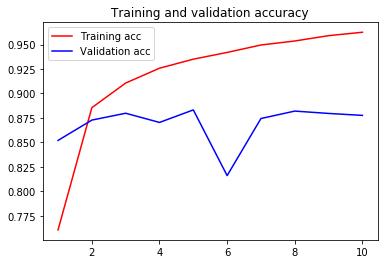

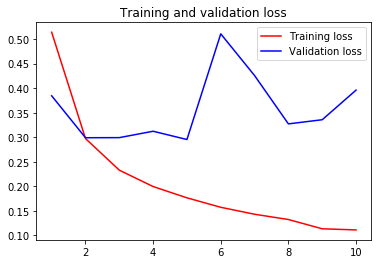

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()